In [47]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt



In [48]:
# log = pd.read_json('../twitter_API.json')

consumerKey = 'Q14WceuNyURjczW8zgTaowy07'
consumerSecret = 'NBtafH472ftS1OB97moW3aE3Xz9Adt87x0L93PaGyQRsAmSTi8'
accessToken = '1437704103015112704-ZLX6wn48ugf54s4UfW6wLSLGUGusQM'
accessTokenSecret = '18iZa6eKf8kfqOajnapGbwlK4IyeiFakbSY1S7rCplgsI'


In [49]:
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit = True)

In [50]:
account = 'peta'

In [51]:
tweets = tweepy.Cursor(api.search,
                   q = account,
                   tweet_mode='extended',
                   lang='en',
                   exclude_replies=True,).items(3250)

likes=[]

retweets=[]

date=[]


for tuit in tweepy.Cursor(api.user_timeline,screen_name= account).items(3250):
    date.append(tuit.created_at)


for tuit in tweepy.Cursor(api.user_timeline,screen_name= account).items(3250):
    likes.append(tuit.favorite_count)
    
# B = np.asarray(likes)
# ind = np.argpartition(B, -10)[-10:]
 
# B[ind]    
    
# ind_min = np.argpartition(B, 10)[-10:]

# B[ind_min]
    
for rt in tweepy.Cursor(api.user_timeline,screen_name= account).items(3250):
    retweets.append(rt.retweet_count)



# A = np.asarray(retweets)
# ind = np.argpartition(A, -10)[-10:]
 
# A[ind]


# ind_min = np.argpartition(A, 10)[-10:]

# A[ind_min]
# ids = []
# for page in tweepy.Cursor(api.followers_ids, screen_name="Tesla").pages(1):
#     ids.extend(page)

    
# for tweet in tweets:
#     api.get_status(
#         tweet.favorite_count,
#         tweet.retweet_count
#         )

In [52]:
#dataframe['Places'] = places
#df['newcol'] = arr.toarray().tolist()


In [53]:
df = pd.DataFrame(data=[tweet.full_text for tweet in tweets], columns=['tweets'])
df.head(10)

,tweets
0,@peta @NintendoAmerica Come with me NOT A NUGG...
1,"RT @LadyBruce1: When you sign petitions, tweet..."
2,RT @hekasia: Products made from animal skins i...
3,"RT @PETAUK: At #LondonFashionWeek today, @chlo..."
4,RT @SchmitterCecile: Stop Animal Abuse \nWe ne...
5,@JacobMarkowicz @peta Will you please elaborat...
6,@Cambslive Paint isn't eco Friendly they remin...
7,RT @iankemp07123743: Please help stop the bloo...
8,RT @iankemp07123743: Please help stop the bloo...
9,RT @peta: She's a star on and off screen ✨\n\n...


In [54]:
# df['likes'] = B.tolist()
# df['retweets'] = A.tolist()


def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

 

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

 

# def getAnalysis(score):
#     if score < 0:
#         return -1
#     elif score == 0:
#         return 0
#     else:
#         return 1
    
df['Subjectivity'] = df['tweets'].apply(getSubjectivity)
df['Polarity'] = df['tweets'].apply(getPolarity)
# df['Analysis'] = df['Polarity'].apply(getAnalysis)
df['Likes'] = likes
df['Retweets'] = retweets
df['Dates']= date

 

df

,tweets,Subjectivity,Polarity,Likes,Retweets,Dates
0,@peta @NintendoAmerica Come with me NOT A NUGG...,0.200000,-0.500000,21,11,2021-09-17 15:03:02
1,"RT @LadyBruce1: When you sign petitions, tweet...",0.875000,-0.562500,55,7,2021-09-17 14:33:02
2,RT @hekasia: Products made from animal skins i...,0.900000,0.450000,0,3,2021-09-17 14:18:23
3,"RT @PETAUK: At #LondonFashionWeek today, @chlo...",0.500000,0.150000,1,0,2021-09-17 13:19:10
4,RT @SchmitterCecile: Stop Animal Abuse \nWe ne...,0.288889,-0.593397,1,0,2021-09-17 12:47:01
...,...,...,...,...,...,...
3245,RT @HSIEurope: 🔊 BREAKING: The @Europarl_EN ha...,0.000000,0.000000,1,1,2021-08-03 22:04:53
3246,https://t.co/k0SF9hH3mW : 7a22f568-1c93-4bfa-a...,0.000000,0.000000,0,0,2021-08-03 22:04:40
3247,Please help stop the bloody dolphin &amp; whal...,0.900000,-0.800000,1,0,2021-08-03 22:04:33
3248,Please help stop the bloody whale slaughter on...,0.900000,-0.800000,0,0,2021-08-03 22:04:20


## Data Cleaning

In [55]:
df.head(15)

,tweets,Subjectivity,Polarity,Likes,Retweets,Dates
0,@peta @NintendoAmerica Come with me NOT A NUGG...,0.200000,-0.500000,21,11,2021-09-17 15:03:02
1,"RT @LadyBruce1: When you sign petitions, tweet...",0.875000,-0.562500,55,7,2021-09-17 14:33:02
2,RT @hekasia: Products made from animal skins i...,0.900000,0.450000,0,3,2021-09-17 14:18:23
3,"RT @PETAUK: At #LondonFashionWeek today, @chlo...",0.500000,0.150000,1,0,2021-09-17 13:19:10
4,RT @SchmitterCecile: Stop Animal Abuse \nWe ne...,0.288889,-0.593397,1,0,2021-09-17 12:47:01
5,@JacobMarkowicz @peta Will you please elaborat...,1.000000,0.500000,92,20,2021-09-17 01:03:00
6,@Cambslive Paint isn't eco Friendly they remin...,0.500000,0.375000,100,29,2021-09-17 00:02:02
7,RT @iankemp07123743: Please help stop the bloo...,0.900000,-0.800000,76,17,2021-09-16 23:33:00
8,RT @iankemp07123743: Please help stop the bloo...,0.900000,-0.800000,84,35,2021-09-16 23:03:03
9,RT @peta: She's a star on and off screen ✨\n\n...,0.000000,0.000000,0,0,2021-09-16 22:55:29


In [56]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # removes @mentions
    text = re.sub(r'#', '', text) # removes hashtag symbols
    text = re.sub(r'RT[\s]+', '', text) # removes RT
    text = re.sub(r'https?:\/\/\S+', '', text) # removes hyperlinks
    
    return text

df['tweets'] = df['tweets'].apply(cleanTxt)
df

,tweets,Subjectivity,Polarity,Likes,Retweets,Dates
0,Come with me NOT A NUGGET to the bottom fuck...,0.200000,-0.500000,21,11,2021-09-17 15:03:02
1,": When you sign petitions, tweet endlessly, vo...",0.875000,-0.562500,55,7,2021-09-17 14:33:02
2,: Products made from animal skins involve forc...,0.900000,0.450000,0,3,2021-09-17 14:18:23
3,": At LondonFashionWeek today, spoke up for cr...",0.500000,0.150000,1,0,2021-09-17 13:19:10
4,: Stop Animal Abuse \nWe need to shut down VID...,0.288889,-0.593397,1,0,2021-09-17 12:47:01
...,...,...,...,...,...,...
3245,: 🔊 BREAKING: The _EN has backed calls from a...,0.000000,0.000000,1,1,2021-08-03 22:04:53
3246,: 7a22f568-1c93-4bfa-ad46-d84ab00ca994,0.000000,0.000000,0,0,2021-08-03 22:04:40
3247,Please help stop the bloody dolphin &amp; whal...,0.900000,-0.800000,1,0,2021-08-03 22:04:33
3248,Please help stop the bloody whale slaughter on...,0.900000,-0.800000,0,0,2021-08-03 22:04:20


## Word Cloud

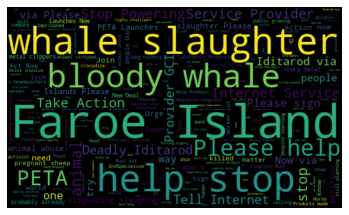

In [57]:
allWords = ' '.join([twts for twts in df['tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Subjectivity and Polarity

In [58]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getAnalysis(score):
    if score < 0:
        return -1
    elif score == 0:
        return 0
    else:
        return 1
    
df['Subjectivity'] = df['tweets'].apply(getSubjectivity)
df['Polarity'] = df['tweets'].apply(getPolarity)
#df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,tweets,Subjectivity,Polarity,Likes,Retweets,Dates
0,Come with me NOT A NUGGET to the bottom fuck...,0.200000,-0.500000,21,11,2021-09-17 15:03:02
1,": When you sign petitions, tweet endlessly, vo...",0.875000,-0.562500,55,7,2021-09-17 14:33:02
2,: Products made from animal skins involve forc...,0.900000,0.450000,0,3,2021-09-17 14:18:23
3,": At LondonFashionWeek today, spoke up for cr...",0.500000,0.150000,1,0,2021-09-17 13:19:10
4,: Stop Animal Abuse \nWe need to shut down VID...,0.288889,-0.593397,1,0,2021-09-17 12:47:01
...,...,...,...,...,...,...
3245,: 🔊 BREAKING: The _EN has backed calls from a...,0.000000,0.000000,1,1,2021-08-03 22:04:53
3246,: 7a22f568-1c93-4bfa-ad46-d84ab00ca994,0.000000,0.000000,0,0,2021-08-03 22:04:40
3247,Please help stop the bloody dolphin &amp; whal...,0.900000,-0.800000,1,0,2021-08-03 22:04:33
3248,Please help stop the bloody whale slaughter on...,0.900000,-0.800000,0,0,2021-08-03 22:04:20


## Sentiment Analysis

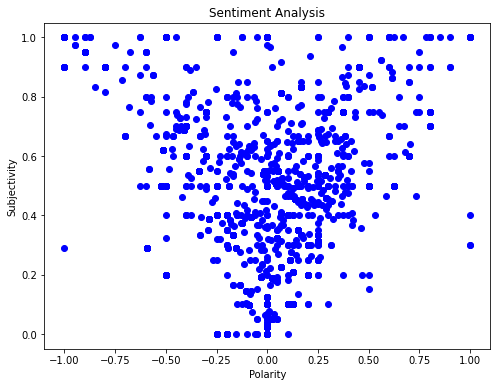

In [59]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [60]:
df.to_csv(r'NewValues.csv', index = False)

In [61]:
df.head(10)

,tweets,Subjectivity,Polarity,Likes,Retweets,Dates
0,Come with me NOT A NUGGET to the bottom fuck...,0.200000,-0.500000,21,11,2021-09-17 15:03:02
1,": When you sign petitions, tweet endlessly, vo...",0.875000,-0.562500,55,7,2021-09-17 14:33:02
2,: Products made from animal skins involve forc...,0.900000,0.450000,0,3,2021-09-17 14:18:23
3,": At LondonFashionWeek today, spoke up for cr...",0.500000,0.150000,1,0,2021-09-17 13:19:10
4,: Stop Animal Abuse \nWe need to shut down VID...,0.288889,-0.593397,1,0,2021-09-17 12:47:01
5,Will you please elaborate on what you consid...,1.000000,0.500000,92,20,2021-09-17 01:03:00
6,Paint isn't eco Friendly they remind me of PETA,0.500000,0.375000,100,29,2021-09-17 00:02:02
7,: Please help stop the bloody whale slaughter ...,0.900000,-0.800000,76,17,2021-09-16 23:33:00
8,: Please help stop the bloody whale slaughter ...,0.900000,-0.800000,84,35,2021-09-16 23:03:03
9,: She's a star on and off screen ✨\n\nThrowbac...,0.000000,0.000000,0,0,2021-09-16 22:55:29


In [62]:
X= df['Subjectivity']

y=df['Polarity']

In [63]:
from sklearn.cluster import KMeans

In [64]:
 kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
 )

In [65]:
X = X.reshape(-1, 1)
kmeans.fit(X)

AttributeError: 'Series' object has no attribute 'reshape'

In [ ]:
# The lowest SSE value
kmeans.inertia_

In [ ]:
# Final locations of the centroid
kmeans.cluster_centers_

In [ ]:
# The number of iterations required to converge
kmeans.n_iter_

In [ ]:
from sklearn.metrics import silhouette_score
#Determine number of cluster by Silouhette Coefficient
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
    }

 # A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

In [ ]:


# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

 # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
#Best k = 10

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.pipeline import Pipeline # For setting up pipeline

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,  
    y, 
    test_size=1/3,
    random_state=0)

In [ ]:
#Pipeline testing

# pipe = Pipeline([
# ('scaler', StandardScaler()),
# ('selector', VarianceThreshold()),
# ('classifier', KNeighborsClassifier())
# ])

In [ ]:

from pandas import read_csv                                
from numpy import ravel                     
import seaborn as sns                                     # For plotting data

from sklearn.neighbors import KNeighborsClassifier    # The k-nearest neighbor classifier
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.pipeline import Pipeline                                  # For setting up pipeline
# Various pre-processing steps
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV

In [ ]:
# Encode the labels into unique integers
encoder = LabelEncoder()
y = encoder.fit_transform(ravel(y))
 
# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=1/3,
    random_state=0)
 
print(X_train.shape)
print(X_test.shape)
 
knn = KNeighborsClassifier().fit(X_train, y_train)
print('Training set score: ' + str(knn.score(X_train,y_train)))
print('Test set score: ' + str(knn.score(X_test,y_test)))
 
pipe = Pipeline([
('scaler', StandardScaler()),
('selector', VarianceThreshold()),
('classifier', KNeighborsClassifier())
])
 
pipe.fit(X_train, y_train)
 
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))
 
parameters = {'scaler': [StandardScaler(), MinMaxScaler(),
	Normalizer(), MaxAbsScaler()],
	'selector__threshold': [0, 0.001, 0.01],
	'classifier__n_neighbors': [1, 3, 5, 7, 10],
	'classifier__p': [1, 2],
	'classifier__leaf_size': [1, 5, 10, 15]
}
 
grid = GridSearchCV(pipe, parameters, cv=2).fit(X_train, y_train)
 
print('Training set score: ' + str(grid.score(X_train, y_train)))
print('Test set score: ' + str(grid.score(X_test, y_test)))
 
# Access the best set of parameters
best_params = grid.best_params_
print(best_params)
# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print(best_pipe)
 
result_df = DataFrame.from_dict(grid.cv_results_, orient='columns')
print(result_df.columns)
 
sns.relplot(data=result_df,
	kind='line',
	x='param_classifier__n_neighbors',
	y='mean_test_score',
	hue='param_scaler',
	col='param_classifier__p')
plt.show()
 
sns.relplot(data=result_df,
            kind='line',
            x='param_classifier__n_neighbors',
            y='mean_test_score',
            hue='param_scaler',
            col='param_classifier__leaf_size')
plt.show()